In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pareto
from scipy.stats import uniform

In [2]:
def random_direction(N):
    θ = uniform.rvs(0, 2*np.pi, size=N-1)
    dirs = np.column_stack((np.cos(θ), np.sin(θ)))
    dirs = np.vstack((np.zeros(2), dirs))
    return dirs

# Generate the length of time and space displacement
alpha = 1 # [0.5,1,1.5,2,3]
beta = 0.5 # [0.5,1,1.5]
Δt_min = 1
Δx_min = 1

def draw_lengths(alpha, beta, N):
    Δx = np.array(pareto.rvs(alpha,size=N))
    Δt = np.array(pareto.rvs(beta,size=N))

    Δx[Δx < Δx_min] = 0
    Δt[Δt < Δt_min] = 0
    return Δx,Δt

def Random_Walk(alpha, beta, N):
    directions = random_direction(N)
    displacements, times = draw_lengths(alpha, beta, N)
    return directions, displacements, times

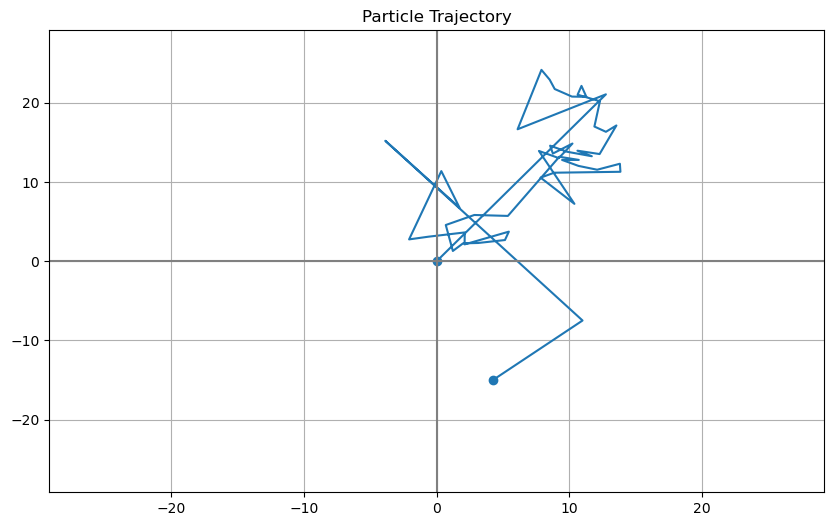

In [3]:
dir, x, t = Random_Walk(alpha,beta,50)
positions = np.cumsum(dir*x[:,np.newaxis],axis=0)

# Plot the trajectory of the particle
plt.figure(figsize=(10, 6))
plt.plot(positions[:,0],positions[:,1])
plt.scatter([positions[0,0],positions[-1,0]],[positions[0,1],positions[-1,1]])

# Center the zero position on the y-axis
plt.axhline(0, color='gray', linestyle='-')
plt.axvline(0, color='gray', linestyle='-')

# Set the y-axis limits to center the zero position
y_min = positions[:,1].min()
y_max = positions[:,1].max()
y_range = max(abs(y_min), abs(y_max))
plt.ylim(-y_range-5, y_range+5)

# Set the x-axis limits to center the zero position
x_min = positions[:,0].min()
x_max = positions[:,1].max()
x_range = max(abs(x_min), abs(x_max))
plt.xlim(-x_range-5, x_range+5)

# Labeling the plot
plt.title('Particle Trajectory')
plt.grid(True)

# Show the plot
plt.show()